In [2]:
from branching_sus.markov_chain import Metropolis, ModifiedMetropolis, ChainData
import numpy as np
import arviz as az
from numpy.random import default_rng
from scipy.stats import multivariate_normal
az.style.use('arviz-darkgrid')

In [3]:
rng = default_rng(0)

log_proportional = lambda x: multivariate_normal.logpdf(x,mean=np.zeros(2))

chain_list = [[np.array([-3,-3])], [np.array([3,3])]]
chain_data = ChainData(chain_list = chain_list,
                       parameter_names = ['x1','x2'])


def proposal_sampler(x):
    return multivariate_normal.rvs(mean=x, random_state=rng)
    

metropolis = Metropolis(proposal_sampler = proposal_sampler,
                        log_proportional_target = log_proportional,
                        random_state = rng)


metropolis.update(chain_data,1000)
chain_data.trim(100)

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x1'}>],
       [<Axes: title={'center': 'x2'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

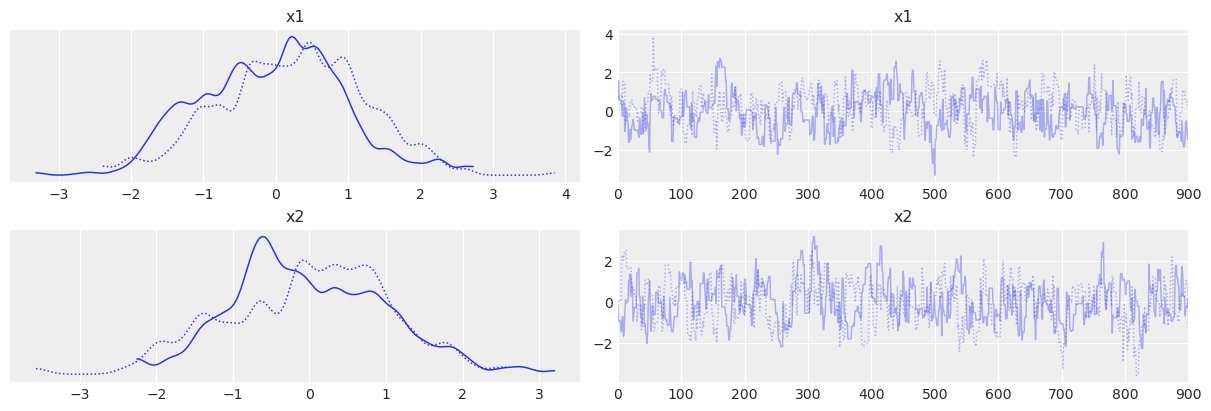

In [4]:
az.plot_trace(chain_data.chain_dict)

In [5]:
rng = default_rng(0)



chain_list = [[np.array([-3,-3])], [np.array([3,3])]]
chain_data = ChainData(chain_list=chain_list,
                       parameter_names=['x1','x2'])

    

modified_metropolis = ModifiedMetropolis(std_list = [1,1],
                                         indicator = lambda x: 1 ,
                                         random_state = rng)

modified_metropolis.update(chain_data,1000)
chain_data.trim(100)

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x1'}>],
       [<Axes: title={'center': 'x2'}>, <Axes: title={'center': 'x2'}>]],
      dtype=object)

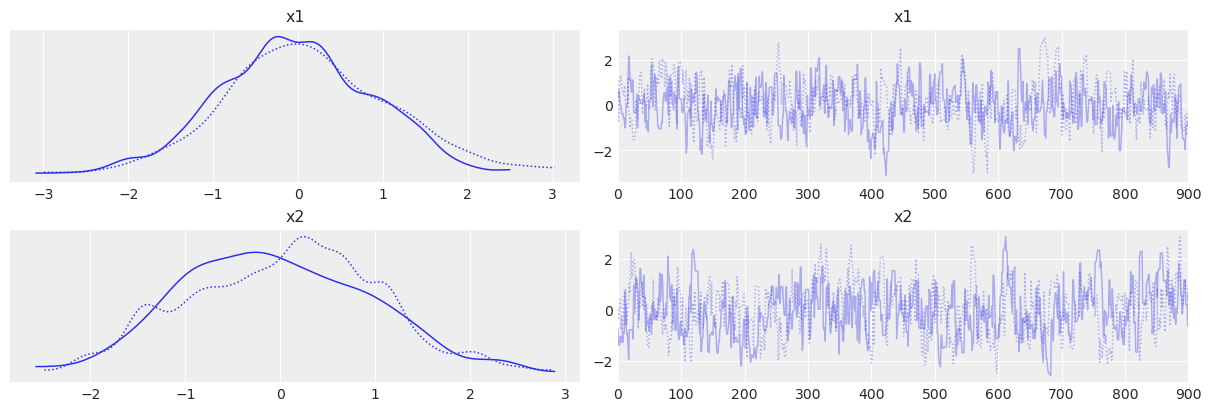

In [6]:
az.plot_trace(chain_data.chain_dict)